# EDA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [4]:
train.head(5)

,pointid,Salinity_today,Temperature_today,Substrate,Depth,Exposure,Presence
0,1557521,30.467175,6.472158,1.0,-124.810000,972065.250,0
1,893106,5.571699,3.367225,0.0,-6.122131,19108.832,0
2,1326854,6.657795,5.305255,1.0,-162.640000,772179.300,0
3,196477,2.744422,1.934046,0.0,-35.440000,407472.400,0
4,168448,2.797321,2.039138,1.0,-51.250000,408049.120,0


lets see class balance

In [5]:
positive = sum(train['Presence']==1)
negative = sum(train['Presence']==0)
print(f"+{positive} vs -{negative}")
print(f"{100*positive/len(train):.4f}% of positive labels")

+50 vs -2625994
0.0019% of positive labels


In [6]:
train[train['Presence']==1].isnull().sum()

pointid               0
Salinity_today       18
Temperature_today    18
Substrate             0
Depth                 0
Exposure              0
Presence              0
dtype: int64

It seems that Salinity_today and Temperature_today were nan both at a time.

So, we have clear, good positive only 32 samples.

Balancing measures are necessary.

Tried a submission with all 0s and got 50% of accuracy - test dataset is balanced.

In [37]:
p_s = train[['Substrate', 'Presence']]
print(f"p=1 s=1: {len(p_s[p_s['Presence']==1][p_s['Substrate']==1])}")
print(f"p=0 s=1: {len(p_s[p_s['Presence']==0][p_s['Substrate']==1])}")
print(f"p=1 s=0: {len(p_s[p_s['Presence']==1][p_s['Substrate']==0])}")
print(f"p=0 s=0: {len(p_s[p_s['Presence']==0][p_s['Substrate']==0])}")

D:\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


p=1 s=1: 13
p=0 s=1: 2513091
p=1 s=0: 37
p=0 s=0: 112903


D:\Python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
D:\Python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [7]:
print(list(train.columns))
real_features = ['Salinity_today', 'Temperature_today', 'Depth', 'Exposure']

['pointid', 'Salinity_today', 'Temperature_today', 'Substrate', 'Depth', 'Exposure', 'Presence']


D:\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


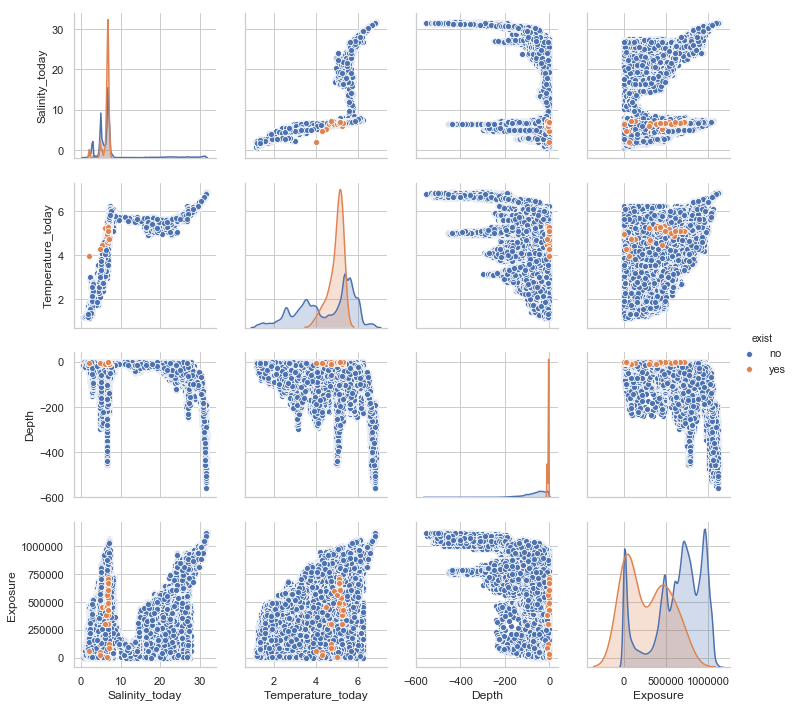

In [43]:
df = train[real_features+['Presence']]
df['exist'] = pd.Series(['yes' if p==1 else 'no' for p in df['Presence']], index=df.index)
df = df[real_features+['exist']]
g = sns.pairplot(df, hue="exist")
plt.show()
plt.close()

In [38]:
from sklearn.feature_selection import mutual_info_classif
df = train.dropna()
mi = mutual_info_classif(df[real_features+['Substrate']], df['Presence']) # mutual info same as info gained

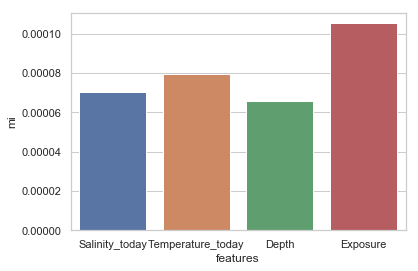

In [41]:
sns.set(style="whitegrid")
ax = sns.barplot(x="features", y="mi", data=pd.DataFrame(data={
    'features': (real_features+['Substrate'])[:-1],
    'mi': mi[:-1]
}))
plt.show()
plt.close()